<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">

<h1><b>Titanic Survival Prediction - Business Problem</b></h1>

<h2><b>Business Problem Statement</b></h2>

Given passenger data such as age, gender, passenger class, fare, and familySize, can we develop a predictive model to estimate the likelihood of survival?<br>
The goal is to uncover patterns that can inform and optimize passenger safety protocols and emergency evacuation strategies in modern transport systems.

<hr>

<h2><b>Real-World Application</b></h2>

Although Titanic is a historical event, this analysis simulates a real-world problem relevant to:

<ul>
  <li><b>Cruise ship safety planning</b></li>
  <li><b>Passenger risk profiling</b></li>
  <li><b>Emergency evacuation strategy</b></li>
  <li><b>Insurance underwriting</b></li>
</ul>

<hr>

<h2><b>Objective</b></h2>

<ul>
  <li>Analyze patterns in the Titanic dataset using <b>exploratory data analysis (EDA)</b></li>
  <li>Handle <b>missing data</b> and prepare features for modeling</li>
  <li>Build a <b>classification model (Random Forest)</b> to predict passenger survival</li>
  <li>Evaluate model performance and interpret <b>feature importance</b></li>
</ul>

<hr>

<h2><b>Business Value</b></h2>

<ul>
  <li>Identify the <b>key factors</b> that influence passenger survival</li>
  <li>Apply <b>data-driven insights</b> to improve safety procedures in transport systems</li>
  <li>Showcase the ability to apply <b>data science skills</b> to real-world business problems</li>
</ul>

</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('titanic.csv')
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
# Drop less useful columns
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId', 'Embarked'], axis=1, inplace=True)

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2>Data Preprocessing</h2>
</div>

In [4]:
# Handle missing value
df.isnull().sum() # Check missing value

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

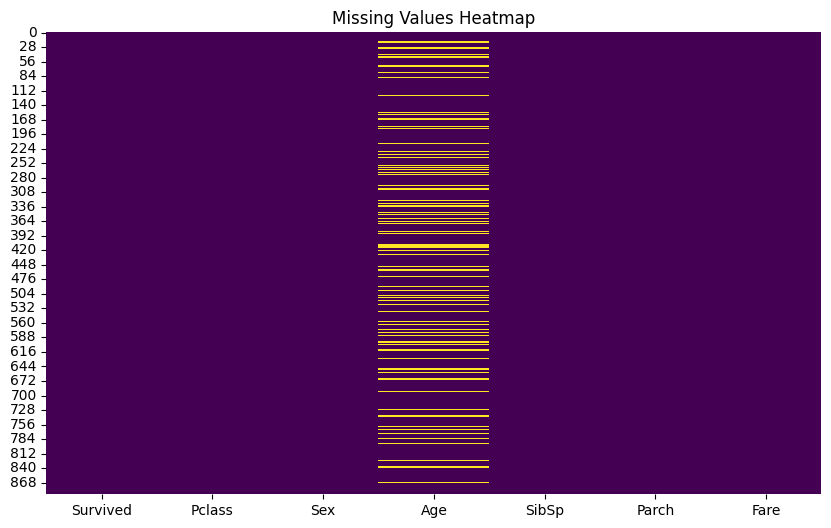

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True) # Fill missing values of age with median
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

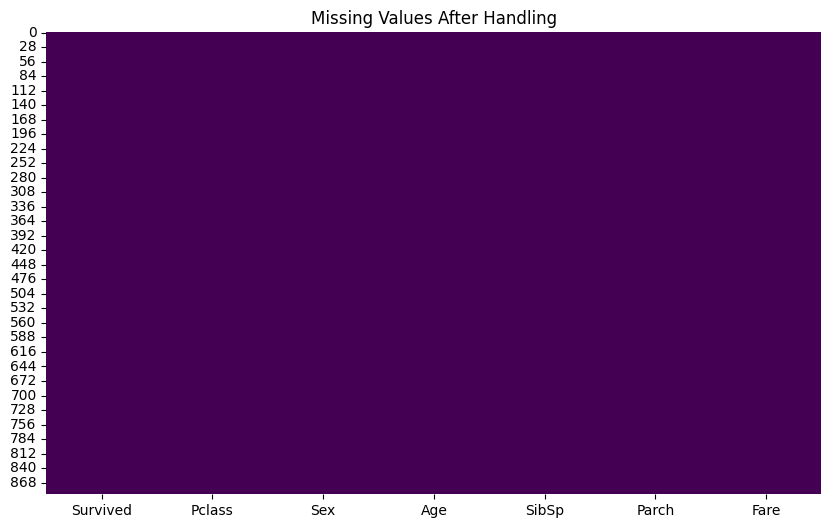

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values After Handling")
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2>Exploratory Data Analysis</h2>
</div>

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h4>Univariate Analysis (One Variable)</h4>
</div>

### Survived

In [8]:
# Number of survived and not survived passenger
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
# Total number of passengers
df['Survived'].value_counts().sum()

891

Survival Rate (%):
 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


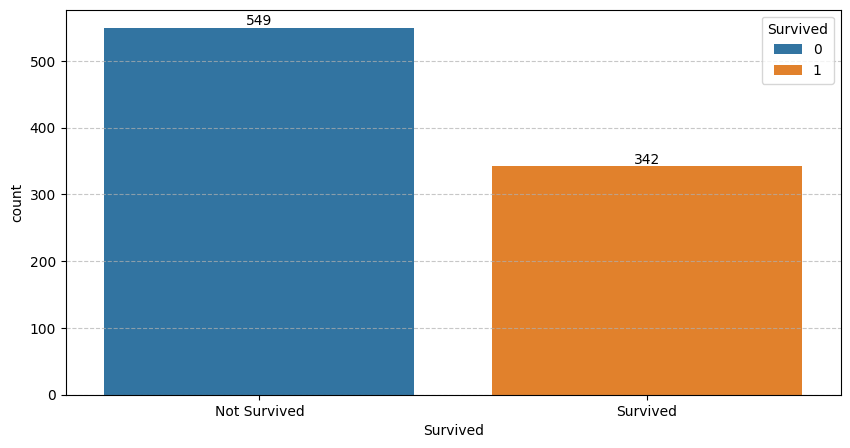

In [10]:
# Plotting a barchart of Survived and not survived pessenger and its count
plt.figure(figsize=(10, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = sns.countplot(x = 'Survived', data=df, hue='Survived')
plt.xticks([0, 1], ['Not Survived', 'Survived'])

for bars in ax.containers:
    ax.bar_label(bars)

# Percentage survived
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print("Survival Rate (%):\n", survival_rate)


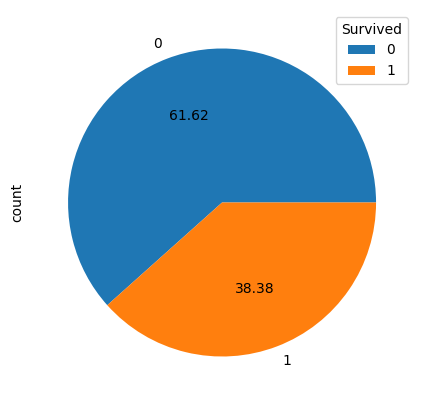

In [11]:
# Plot the percentage of survival and nor survival passenger 
plt.figure(figsize=(10, 5)) 
survival_count = df['Survived'].value_counts()

ax = survival_count.plot(kind='pie', autopct='%.2f')  # autopct stands for "automatic percentage"
ax.legend(title='Survived', loc='best')

plt.show()

### Sex

In [12]:
# Find number of male and female passenger
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Gender_rate (%):
 Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


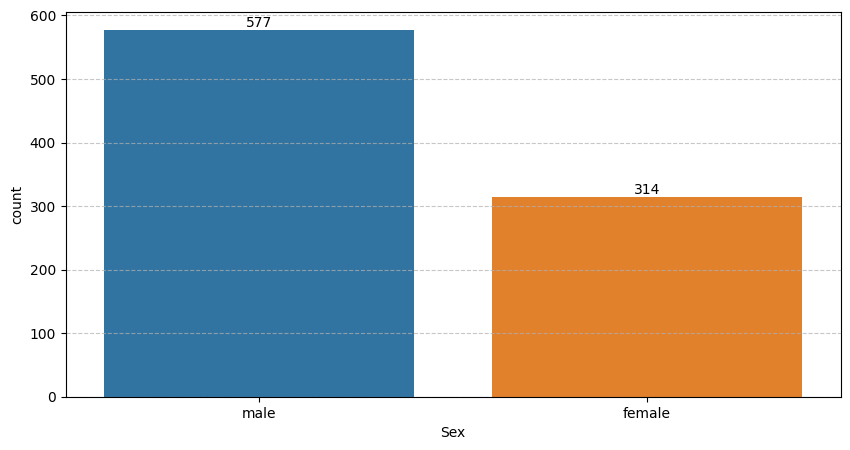

In [13]:
# Plot the male and female passenger 
plt.figure(figsize=(10, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax = sns.countplot(data=df, x='Sex', hue='Sex')


for bars in ax.containers:
    ax.bar_label(bars)

gender_rate = df['Sex'].value_counts(normalize=True) * 100
print("Gender_rate (%):\n", gender_rate)

### Pclass

In [14]:
# Find of how many passenger travel in different cclass 
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Pclass_rate (%):
 Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


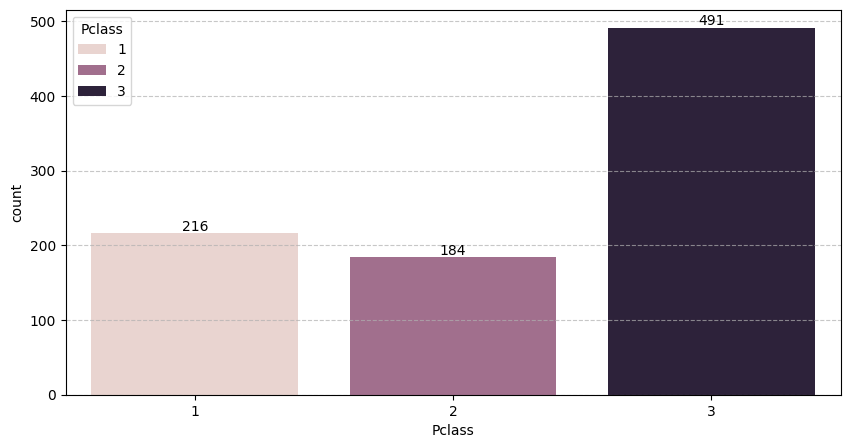

In [15]:
plt.figure(figsize=(10, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = sns.countplot(data=df, x='Pclass', hue='Pclass')
for bars in ax.containers:
    ax.bar_label(bars)

Pclass_rate = df['Pclass'].value_counts(normalize=True) * 100
print("Pclass_rate (%):\n", Pclass_rate)

In [16]:
# Count the number of female and male travel in different class
df.groupby(['Sex'])['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: count, dtype: int64

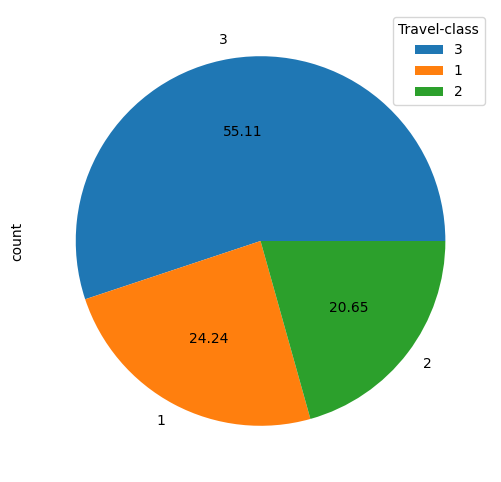

In [17]:
# plot the percent of traveling class 
plt.figure(figsize=(10, 6)) 
pclass_count = df['Pclass'].value_counts()

ax = pclass_count.plot(kind='pie', autopct='%.2f')  # autopct stands for "automatic percentage"
ax.legend(title='Travel-class', loc='best')

plt.show()

### Age Distribution

In [18]:
df['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

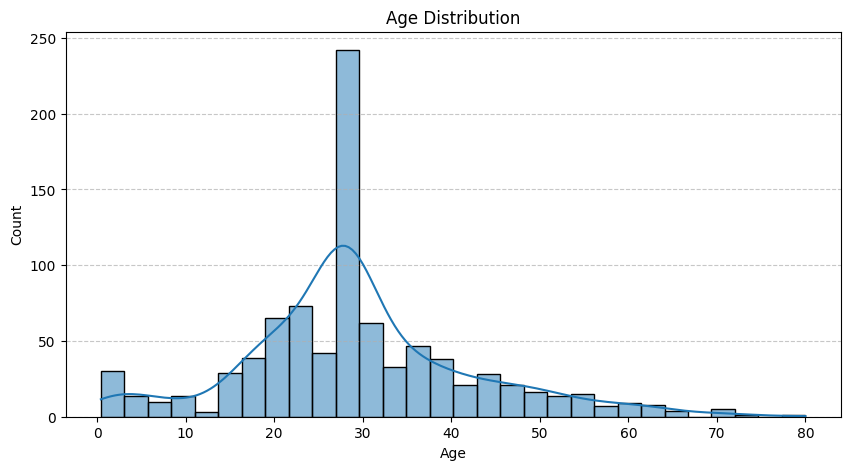

In [19]:
plt.figure(figsize=(10, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h4>Bivariate Analysis (Two Variables)</h4>
</div>

### Survival by Sex

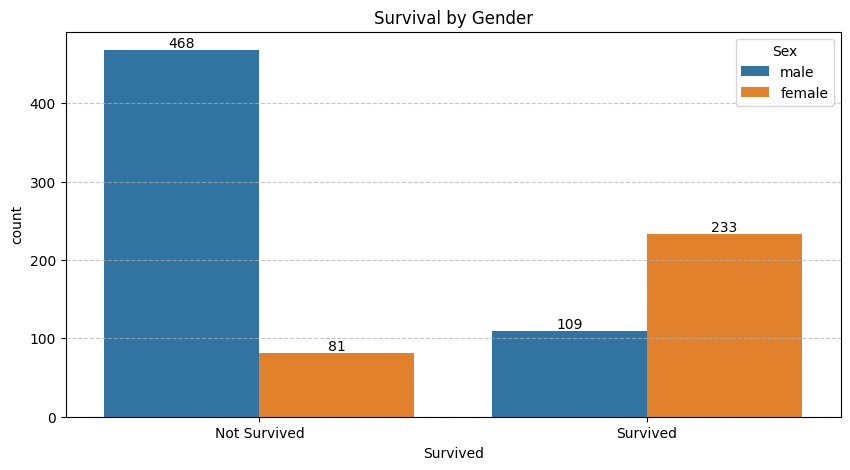

In [20]:
# plot survival by gender
plt.figure(figsize=(10, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = sns.countplot(x='Survived', data=df, hue='Sex')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Survival by Gender')
plt.legend(title='Sex')
plt.show()

### Survival by Pclass

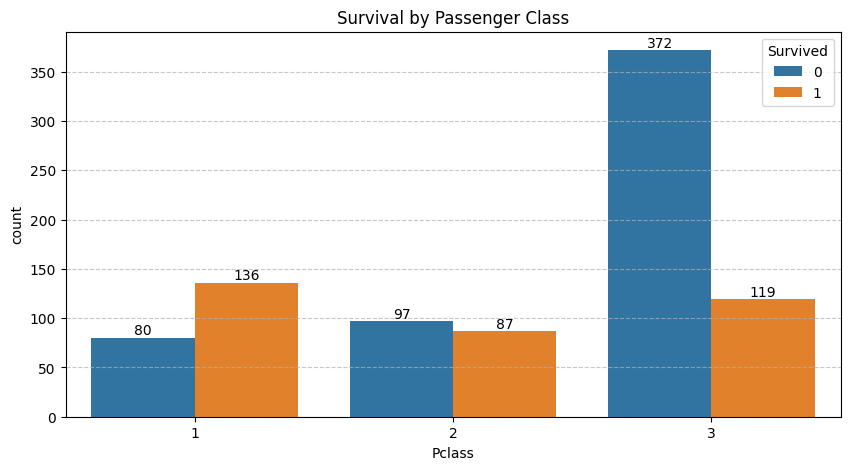

In [21]:
plt.figure(figsize=(10, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = sns.countplot(x='Pclass', data=df, hue='Survived')
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Survival by Passenger Class')
plt.legend(title='Survived')
plt.show()

### Survival by Age

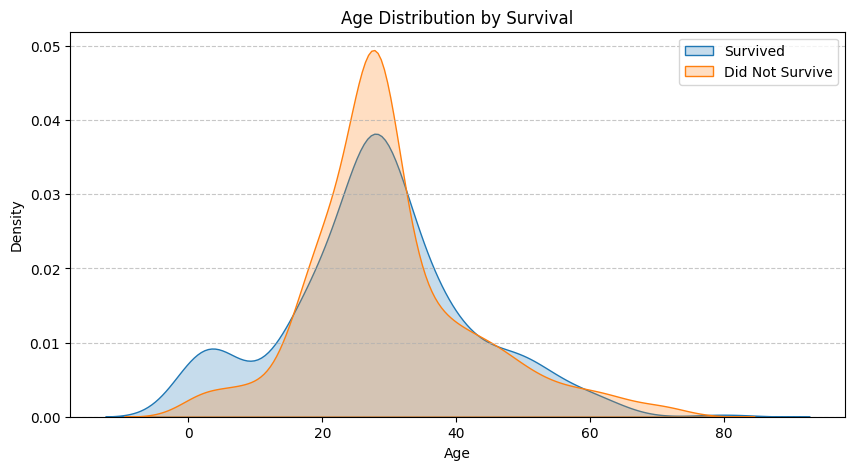

In [22]:
plt.figure(figsize=(10, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', fill=True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

### Fare of each class

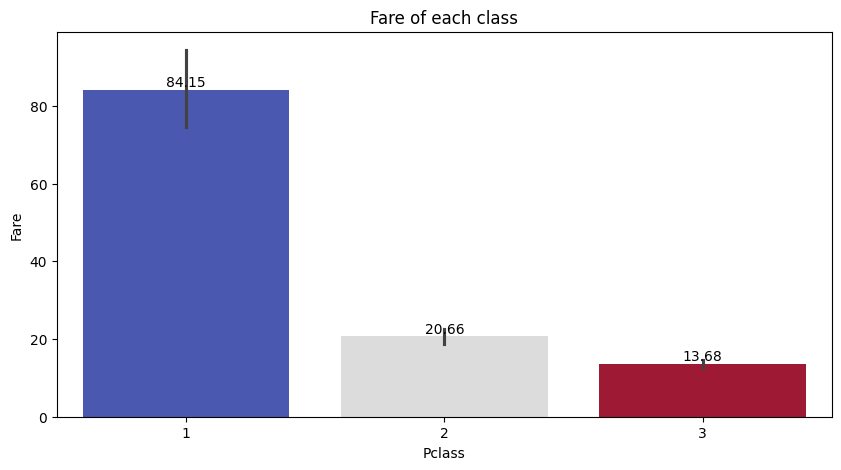

In [23]:
plt.figure(figsize=(10, 5))
 
ax = sns.barplot(x='Pclass', y='Fare', data=df, hue='Pclass', palette='coolwarm', legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.2f")

plt.title("Fare of each class")
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h4>Pair-Plot (It is used to provide scatterplot of each numerical column)h4>
</div>

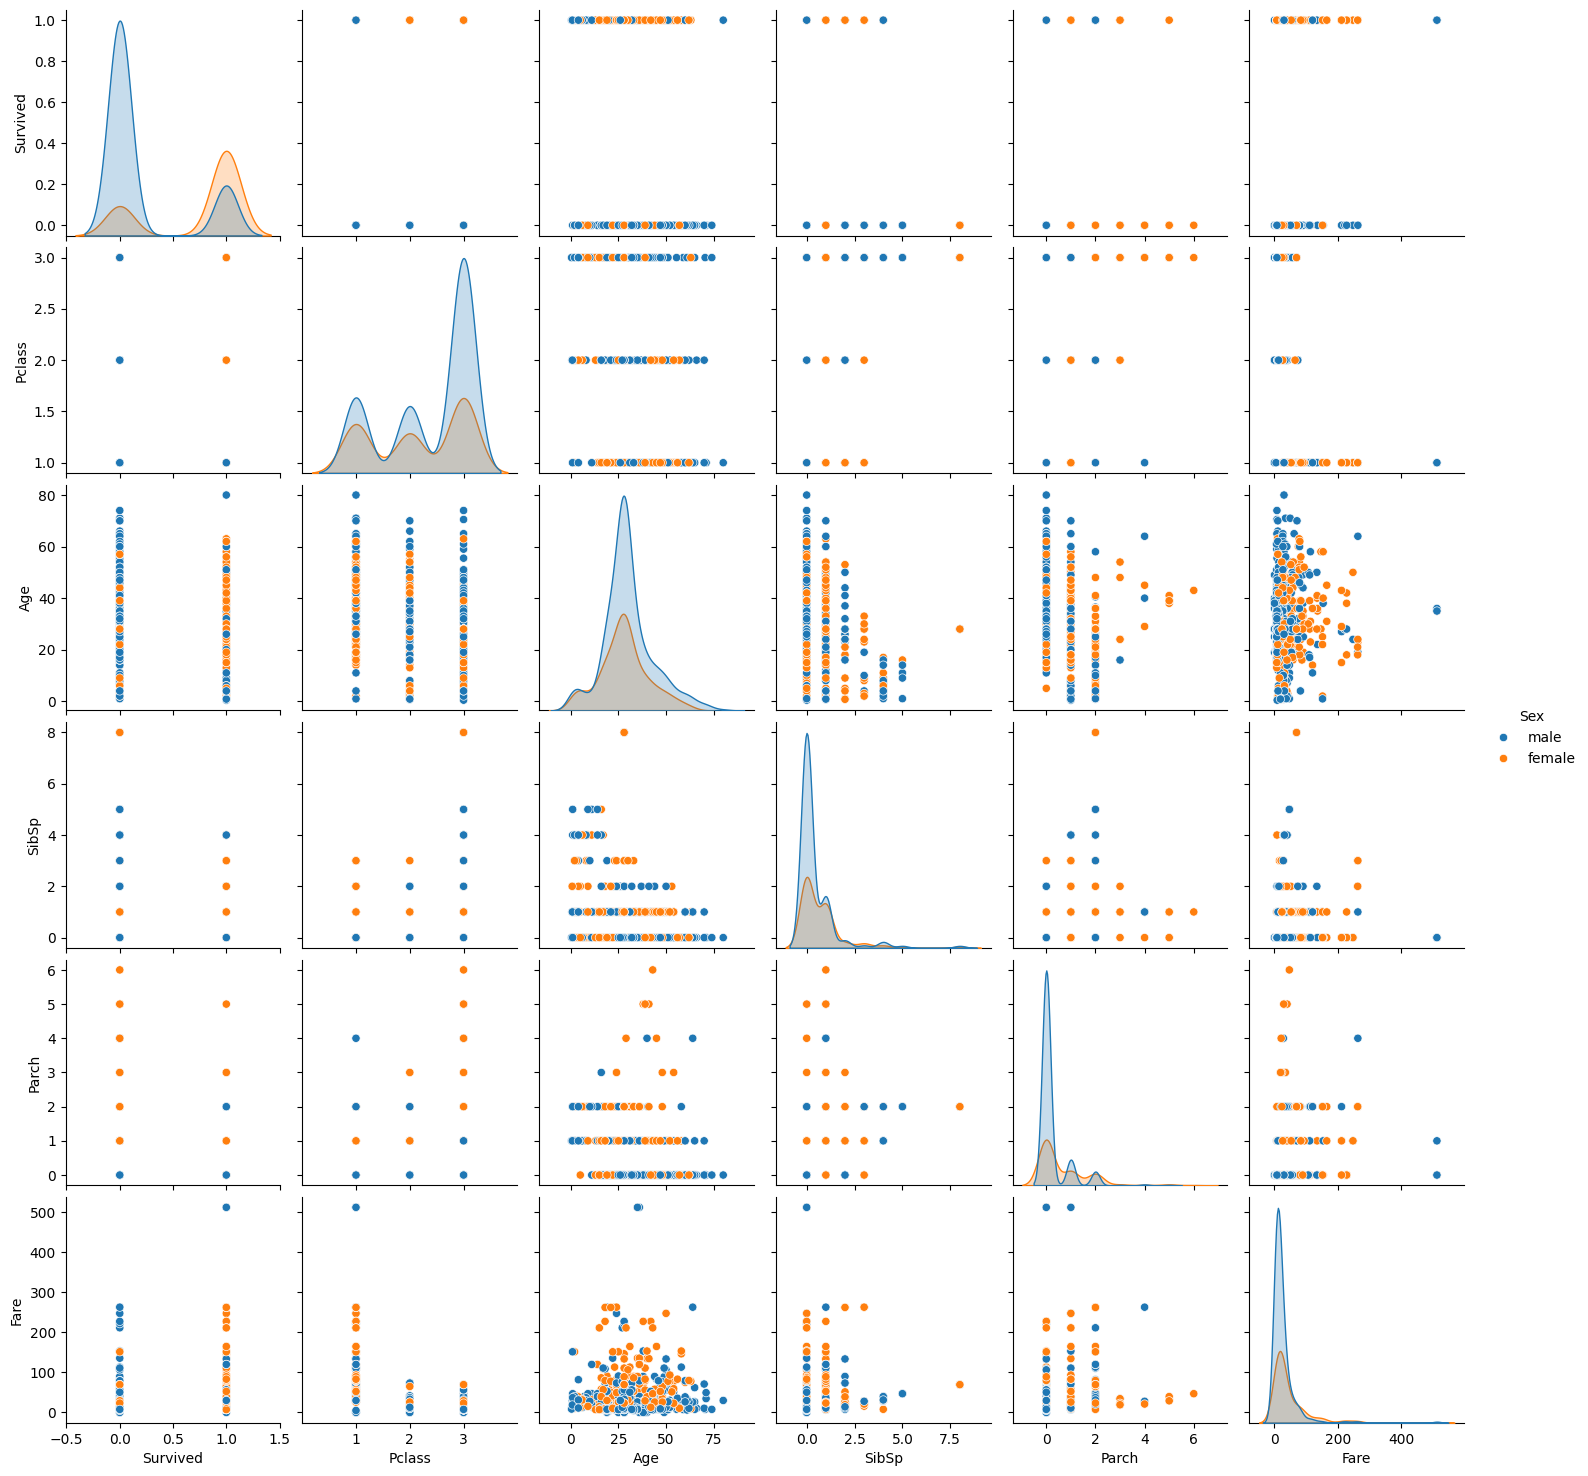

In [24]:
sns.pairplot(data=df, hue='Sex')
plt.show()

<div style="font-family: 'Times New Roman', serif;">

  <h3>Conclusion <em>(19th July 2025)</em></h3>

  <p>he pairplot reveals noticeable patterns between male and female passengers. In particular:</p>

  <ul>
    <li><strong>Fare vs. Age:</strong> Female passengers tend to have slightly higher fares across various ages compared to males, possibly indicating they traveled in higher classes.</li>
    <li><strong>Age distribution:</strong> Female passengers show a broader distribution across all age ranges, while male passengers are more concentrated in younger age groups.</li>
    <li><strong>Inter-feature relationships:</strong> Some features show mild separation between sexes, suggesting that <strong>Sex</strong> may play a role in classification or survival prediction.</li>
  </ul>

  <p>Overall, this visualization helps highlight that <strong>gender differences are evident in various numerical features</strong> and should be considered during further analysis or model building.</p>

</div>


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2>Feature Engineering</h2>
</div>

In [25]:
# Create 'familySize' as a features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [26]:
# Encode categorical variables
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])       # male=1, female=0
# df['Embarked'] = label.fit_transform(df['Embarked']) # 'C' → 0, 'Q' → 1, 'S' → 2

In [27]:
# Choose relevent features and target 
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']]
y = df["Survived"]

In [28]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h4>Model Comparison</h4>
</div>

In [29]:
# Define Models for Comparison
models = {
     "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [30]:
# Cross-Validation & Accuracy Comparison
model_names = []
cv_means = []

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model_names.append(name)
    cv_means.append(scores.mean())
    print(f"{name} - Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression - Accuracy: 0.7864 ± 0.0321
Decision Tree - Accuracy: 0.7824 ± 0.0263
Random Forest - Accuracy: 0.8034 ± 0.0182
SVM (RBF Kernel) - Accuracy: 0.6699 ± 0.0154
K-Nearest Neighbors - Accuracy: 0.7023 ± 0.0294


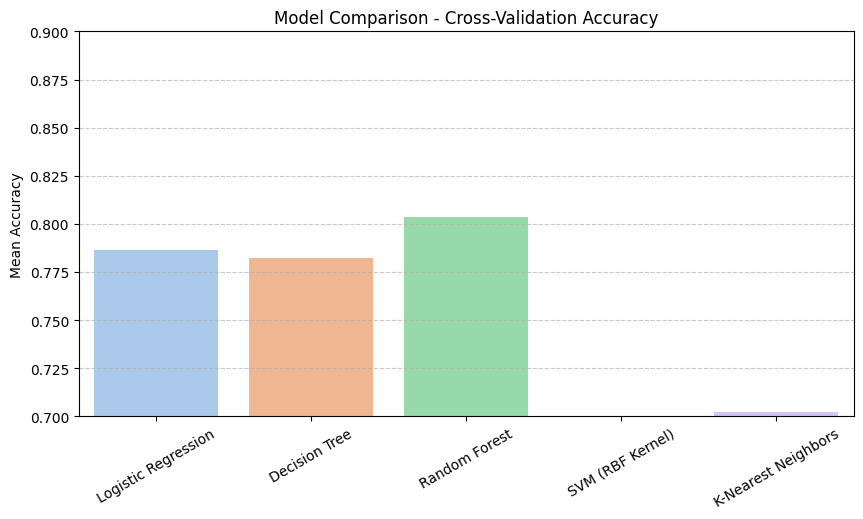

In [31]:
# Plot Accuracy Score
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=cv_means, palette='pastel')
plt.title("Model Comparison - Cross-Validation Accuracy")
plt.ylabel("Mean Accuracy")
plt.xticks(rotation=30)
plt.ylim(0.7, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
# Final Evaluation of Best Model (Random Forest)
# Train the model 
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Predict on test data 
y_pred = model.predict(X_test)

In [35]:
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.80

Confusion Matrix:
 [[88 17]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



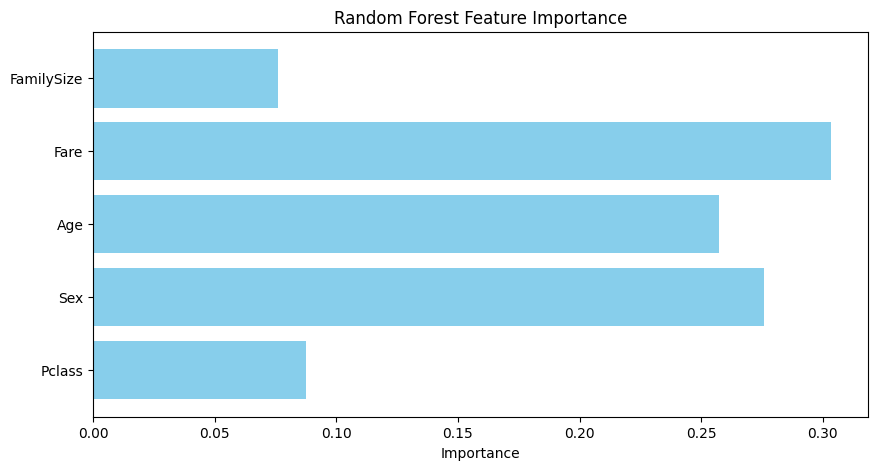

In [36]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [37]:
#Save the Model for Deployment
import joblib

best_model = model
joblib.dump(best_model, "final_model.pkl")

['final_model.pkl']

In [ ]:
model = joblib.load("final_model.pkl")

new_data = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 0,
    'Age': 75,
    'Fare': 7.25,
    'FamilySize':2
}])

In [ ]:
predictions = model.predict(new_data)
print("Prediciton:", predictions)